In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
import numpy as np

X = np.array([[1, 1], [2, 1],[4, 3],[5, 4]])

In [84]:
X.shape

(4, 2)

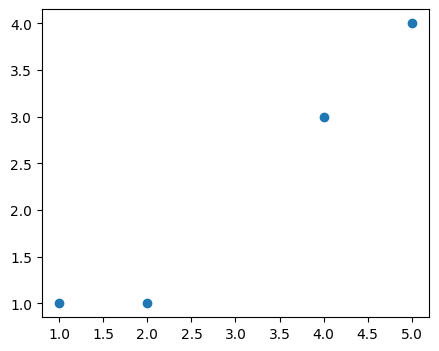

In [67]:
plt.figure(figsize = (5, 4))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [68]:
np.random.seed(42)
np.random.shuffle(X)

print(X)

[[2 1]
 [5 4]
 [1 1]
 [4 3]]


In [69]:
k = 2
centroids = X[:k]

In [70]:
print(f"my centroids : {centroids}")

my centroids : [[2 1]
 [5 4]]


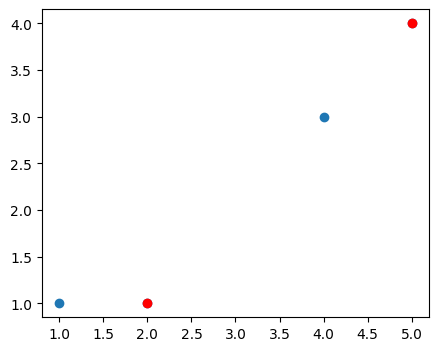

In [71]:
plt.figure(figsize = (5, 4))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], color = 'red')
plt.show()

In [72]:
def euclidienne_function(points, centroid) :
  return np.sqrt(np.sum((points - centroid) ** 2))

In [73]:
def assign_centroids(X, centroids) :
  lists = []
  for points in X :
    distances = [euclidienne_function(points, centroid) for centroid in centroids]
    closest_centroid = np.argmin(distances)
    lists.append(closest_centroid)

  return lists

In [74]:
lists = assign_centroids(X, centroids)
centroids

array([[2, 1],
       [5, 4]])

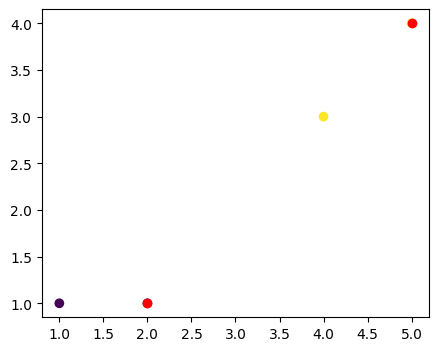

In [75]:
plt.figure(figsize = (5, 4))
plt.scatter(X[:, 0], X[:, 1], c=lists, cmap = 'viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], color = 'red')
plt.show()

(2, 2)

In [76]:
def recalculate_centroids(X, labels, k) :
  new_centroids = np.zeros((k, X.shape[1]))
  for i in range(k) :
    points_assigned = X[np.array(labels) == i]
    if len(points_assigned) > 0 :
      new_centroids[i] = np.mean(points_assigned, axis = 0)

  return new_centroids

In [77]:
max_iterations = 10
for i in range(max_iterations) :
  labels = assign_centroids(X, centroids)
  new_centroids = recalculate_centroids(X, labels, k)

  if np.all(centroids == new_centroids) :
    print(f"Centroids converged after {i + 1} iterations")
    break

  centroids = new_centroids

Centroids converged after 2 iterations


In [78]:
print(f"Final centroids : {centroids}")

Final centroids : [[1.5 1. ]
 [4.5 3.5]]


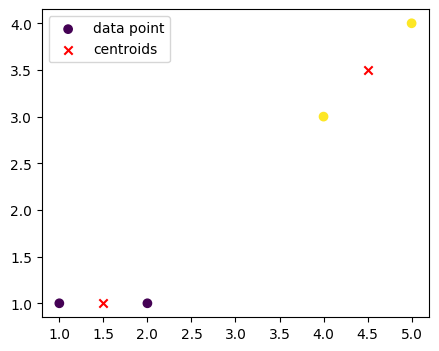

In [79]:
plt.figure(figsize = (5, 4))
plt.scatter(X[:, 0], X[:, 1], c=lists, cmap = 'viridis', label = 'data point')
plt.scatter(centroids[:, 0], centroids[:, 1], color = 'red', marker = 'x', label = 'centroids')
plt.legend()
plt.show()